In [2]:
import pandas as pd
import numpy as np
import os
import sys
import soundfile as sf

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [3]:
Ravdess = "D:\\Projects\\Ravdess\\audio_speech_actors_01-24"
Crema = "D:\\Projects\\crema\\AudioWAV"
Tess = "D:\\Projects\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data"
Savee = "D:\\Projects\\savee\ALL"

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
    
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))
       
    
emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
path_df = pd.DataFrame(file_path, columns = ['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis = 1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6:'fear', 7: 'disgust', 8: 'surprise'}, inplace = True)
Ravdess_df.head()

,Emotions,Path
0,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
1,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
2,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
3,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
4,calm,D:\Projects\Ravdess\audio_speech_actors_01-24\...


In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] =='DIS':
        file_emotion.append('disgust')
    elif part[2] =='FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])

path_df = pd.DataFrame(file_path, columns = ['Path'])
crema_df = pd.concat([emotion_df , path_df], axis = 1)
crema_df.head()

,Emotions,Path
0,angry,D:\Projects\crema\AudioWAV1001_DFA_ANG_XX.wav
1,disgust,D:\Projects\crema\AudioWAV1001_DFA_DIS_XX.wav
2,fear,D:\Projects\crema\AudioWAV1001_DFA_FEA_XX.wav
3,happy,D:\Projects\crema\AudioWAV1001_DFA_HAP_XX.wav
4,neutral,D:\Projects\crema\AudioWAV1001_DFA_NEU_XX.wav


In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        
        if part == 'ps':
            file_emotion.append('surprise')
        else:
             file_emotion.append(part)
        file_path.append(Tess+ dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion , columns = ['Emotions'])

path_df = pd.DataFrame (file_path, columns = ['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis = 1)
Tess_df.head()

,Emotions,Path
0,angry,D:\Projects\TESS Toronto emotional speech set ...
1,angry,D:\Projects\TESS Toronto emotional speech set ...
2,angry,D:\Projects\TESS Toronto emotional speech set ...
3,angry,D:\Projects\TESS Toronto emotional speech set ...
4,angry,D:\Projects\TESS Toronto emotional speech set ...


In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee+file)
    part = file.split('_')[1]
    ele = part[:-6]
    
    if ele == 'a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
emotion_df = pd.DataFrame(file_emotion , columns = ['Emotions'])
            
path_df = pd.DataFrame(file_path, columns = ['Path'])
Savee_df = pd.concat([emotion_df , path_df], axis = 1)
Savee_df.head()

,Emotions,Path
0,angry,D:\Projects\savee\ALLDC_a01.wav
1,angry,D:\Projects\savee\ALLDC_a02.wav
2,angry,D:\Projects\savee\ALLDC_a03.wav
3,angry,D:\Projects\savee\ALLDC_a04.wav
4,angry,D:\Projects\savee\ALLDC_a05.wav


In [8]:
data_path = pd.concat([Ravdess_df, crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv", index = False)
data_path.head()

,Emotions,Path
0,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
1,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
2,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
3,neutral,D:\Projects\Ravdess\audio_speech_actors_01-24\...
4,calm,D:\Projects\Ravdess\audio_speech_actors_01-24\...


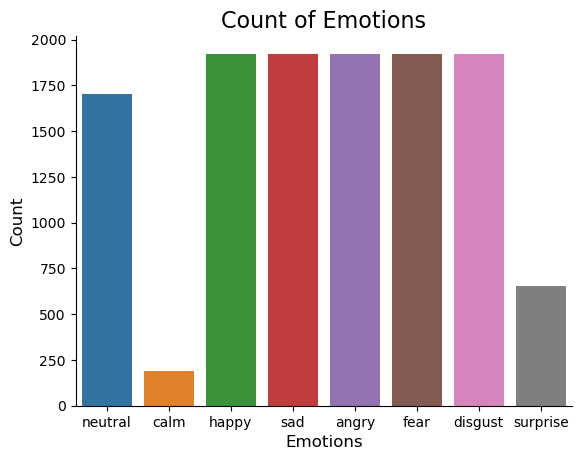

In [9]:
plt.title('Count of Emotions', size = 16)
sns.countplot(x = 'Emotions', data = data_path)
plt.ylabel('Count', size = 12)
plt.xlabel('Emotions', size = 12)
sns.despine (top = True, right= True, left = False, bottom = False)
plt.show()

In [10]:
def create_waveplot (data, sr, e):
    plt.figure(figsize = (10,3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size = 15)
    
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# stft(short term fourier transform) represents signals in the time-frequency domain by computing discrete fourier transformation over short overlapping windows.
#stft function converts the data into short term fourier transform 
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize = (12,3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size = 15)
    librosa.display.specshow(Xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
    
    plt.colorbar()

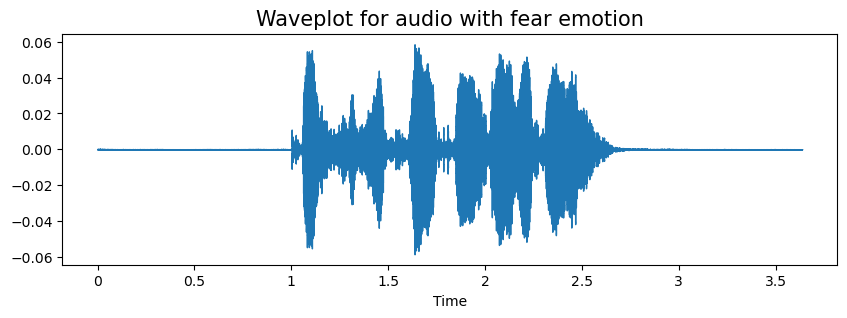

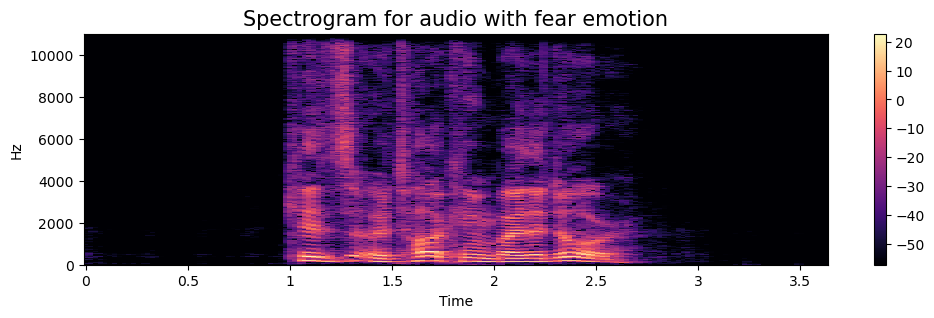

In [11]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path) #sampling rate is the number of samples taken per second)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

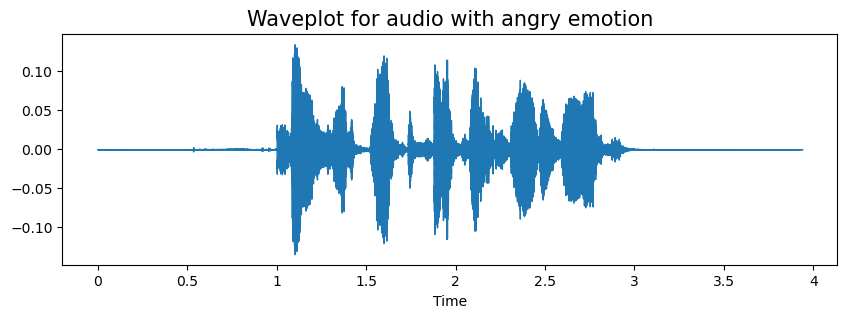

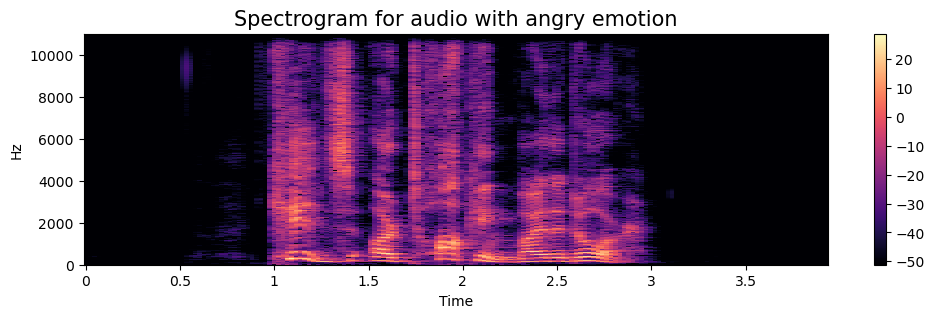

In [12]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

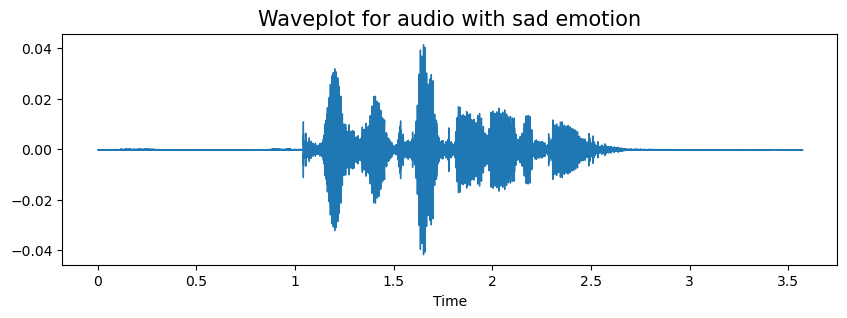

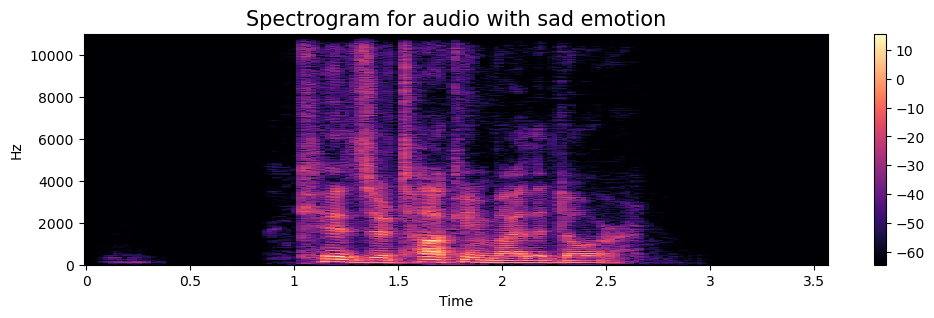

In [13]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram (data, sampling_rate, emotion)
Audio(path)

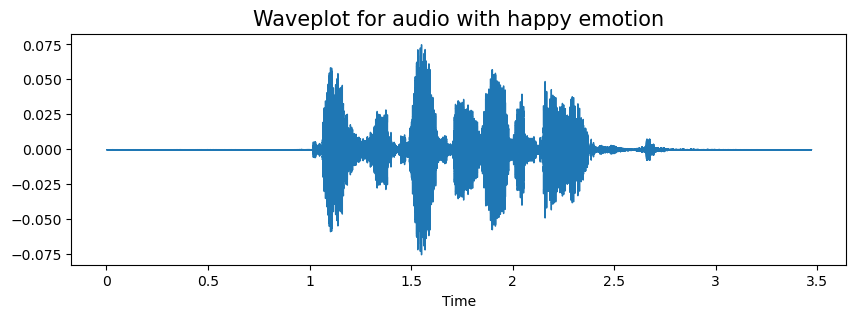

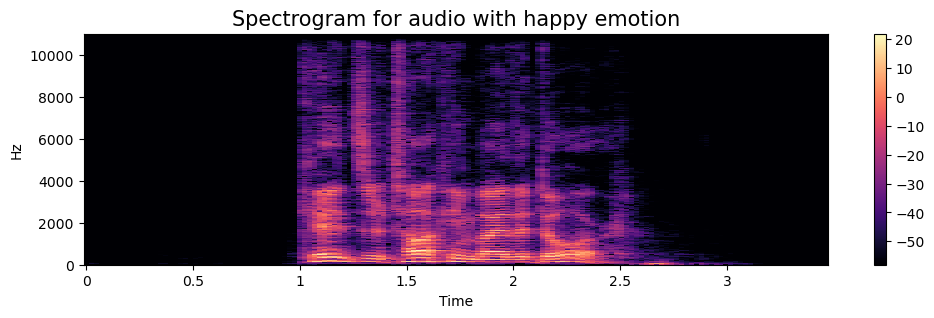

In [14]:
emotion = 'happy'
path= np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data+noise_amp*np.random.normal(size = data.shape[0])
    return data